### Data Cleaning techniques

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [10]:
df1 = pd.read_csv("C:/Users/ezhil/Desktop/BITTU DOCUMENTS/Code basics/Data Scirnce projects CB/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
df1.shape

(13320, 9)

In [12]:
# let's first examine area_type feature, by printing the count of dataset in each of this samples in area_type category

In [13]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [14]:
#  let's drop few columns, which we feel unecessary

In [15]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [16]:
# let's start data cleaning process, starts with handling the na values

In [17]:
df2.isnull().sum() #shows the number of rows which has na values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
# one of the method to handle na is, for eg. in bath we can take median and sil the columns
# but since, we have 13,320 rows, it woun't be a issue in droping 73 rows

In [19]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
# now our data set has no na values
# let's explore the size feature, some values are 4BHK, whle some are 4 Bedroom

In [21]:
df3['size'].unique() #shows unique values in our dataset

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
# to handle this, let's create a new column to our dataset - BHK

In [23]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ezhil\AppData\Local\Temp/ipykernel_20844/2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [24]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [25]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [26]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [27]:
# there is 43bedroom in 2400sq.ft which seems like error
# to tacklw this error let's explore the total_sqft column

In [28]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
# note: see the is range 1133-1384, we need to convert it into a single number
# for that let's take avg of these numbers

# first let's c what kind of variations we have in this total_sqft column
# for that let us detect the given value is float or not

In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
# without '~' called as nigade operation, only when we apply this
# we'll be able to see values, or else it will give just return function true

In [32]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [33]:
# the dataset has meter, perch
# this is a technical problem in any data science projects
# where our dataset has unstructured,data error, not uniform, outliers

In [34]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [35]:
convert_sqft_to_num('1015 - 1540')

1277.5

In [36]:
convert_sqft_to_num('2168')

2168.0

In [37]:
convert_sqft_to_num('4125Perch')# it doesn't return anything

In [38]:
# let's apply function to sqft column and create a new dataframe

In [39]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)# we can apply either lambda or native python function
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [40]:
df4.loc[30] # previously we had 2100-2850, now we have avg of these 2 numbers 2475

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [41]:
# so far we have cleaned totalSqft column and aslso handled our na and removed some unecessary feature

### Feature Engineering and dimensionality reduction techniques 

In [42]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [43]:
df5 = df4.copy()
# let's create price per_sqft column
# let's do some feature engineering and create a new feature, which can be helpful for outliner dedaction and removal
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [44]:
# our new column price per sqft is created, let's keep that aside
# let's explore location column, it is categorical feature(text data)

In [45]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [46]:
len(df5.location.unique())

1304

In [47]:
# we have 1304 unique locations, which is a very big number
# usually we'll create dummy columns using onehotencoding
# but if we do that we'll have 1304 columns in our dataframe, that, too much
# this is called dimensio nality curse, there are techniques to reduce dimensions
# one of the effective technique is other_category, means when we have 1304 locations, there will be many locations with 1 or 2 datapoints 

In [48]:
# let's find out that 1 or 2 datapoints with unique locations
# first we'll strip the extra spaces from locations
df5.location = df5.location.apply(lambda x: x.strip())
#x.strip removes extra space at the end
location_stats = df5.groupby('location')['location'].agg('count')
# aggresgasion function which will give count for per location
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [49]:
location_stats[:50]

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Jayanagar                                14
1st Block Koramangala                              10
1st Phase JP Nagar                                 25
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Kri

In [63]:
# let's sort this by using sort_value function
location_stats.sort_values(ascending=False)[:50]

location
Whitefield                  535
Sarjapur  Road              392
Electronic City             304
Kanakpura Road              266
Thanisandra                 236
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 150
7th Phase JP Nagar          149
Haralur Road                141
Electronic City Phase II    131
Rajaji Nagar                106
Chandapura                   98
Bellandur                    96
KR Puram                     88
Hoodi                        88
Electronics City Phase 1     87
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Hormavu                      74
Banashankari                 74
Ramamurthy Nagar             73
Kengeri                      73
Hosa Road                    72

In [64]:
len(location_stats[location_stats<=10])

1052

In [65]:
len(location_stats)

1293

In [66]:
# out of 1293, 1052 values has location_satats less than 10 datapoints

In [67]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [68]:
# we'll put these locations in a general category named other

In [69]:
len(df5.location.unique())

242

In [70]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [71]:
# after this transformation is done all these locations will be converted to other
# now we have only 242 locations, so when we use onehot encoder we will be having only 242 columns

In [72]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier detection and removal

In [73]:
# outlier are the data points which are data error or sometimes represent the extreme variation in our dataset 
# although they are valid it make sense to remove that
# now we'll apply various techniques to detect and remove outliers, like standard deviation or simple domain knowledge 
    

In [74]:
# let's consider a typical size of bedroom is 300sqft

In [75]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [76]:
# these are called as data eroor or outliersetc..
# like c just 1020sqft has 6bhk, which is not fair
# let's remove all this datapoints

In [77]:
df5.shape

(13246, 7)

In [78]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] # to filter all these rows we want to nigate('~')
df6.shape

(12502, 7)

In [79]:
# we have removed some few outliers

In [80]:
# let's chk price per sqft is very high or very low

In [81]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [82]:
# min represents the min value which is not possible
# let's remove these extreme cases

In [83]:
# we''l write a function to remove price per sqft outliers per location
# we need to do this for per location because some locations will have higher price, some with lower price
# we'll find mean and standard deviation per location and filter out dataset which are beyond one std.deviation

In [84]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [85]:
# now we have removed price_per_sqft outlier from df6

In [86]:
# now we'll chk whether the price of 3bhk apartment is higher than 2bhk for the same sqft

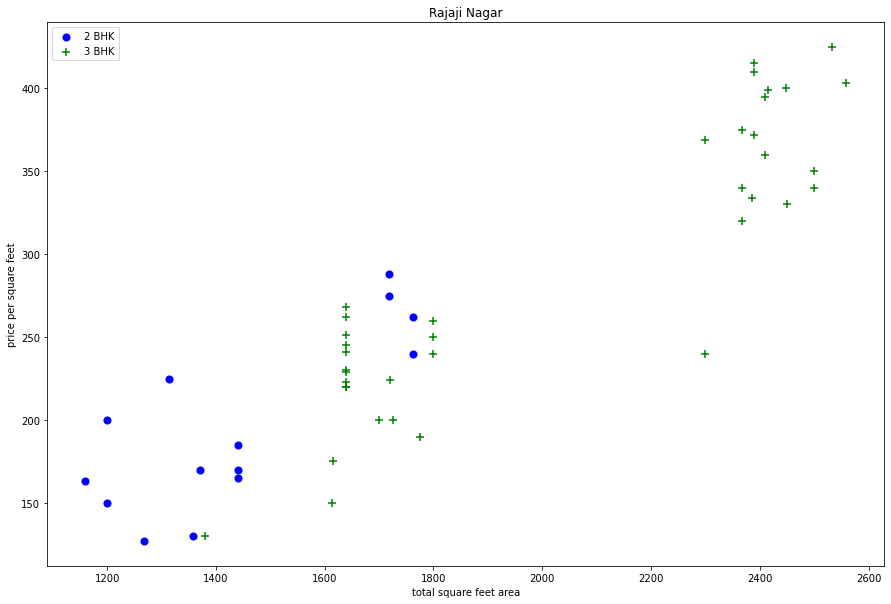

In [87]:
 def plot_scatter_chart(df,location):
        bhk2 = df[(df.location==location) & (df.bhk==2)]
        bhk3 = df[(df.location==location) & (df.bhk==3)]
        matplotlib.rcParams['figure.figsize'] = (15,10)
        plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
        plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
        plt.xlabel('total square feet area')
        plt.ylabel('price per square feet')
        plt.title(location)
        plt.legend()
        
        
plot_scatter_chart(df7, "Rajaji Nagar")

In [88]:
# note: around 1700sqft, 2bhk prices are higher when comparing to 3bhk

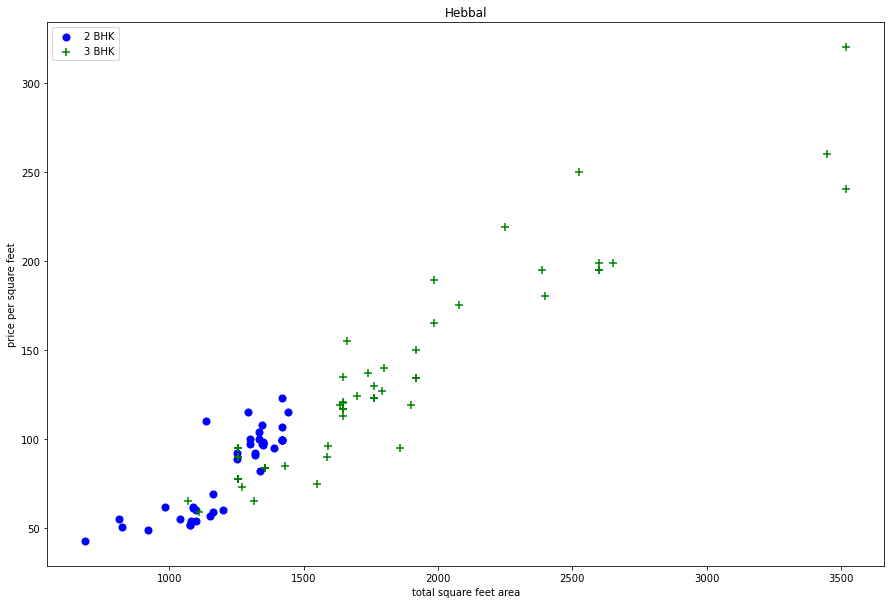

In [89]:
plot_scatter_chart(df7, "Hebbal")

In [90]:
# look near 1000-1500 sqft the prices of 2bhk is higher while comparing to 3bhk

In [91]:
def remove_bhk_ouliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [92]:
df8 = remove_bhk_ouliers(df7)
df8.shape

(7329, 7)

In [93]:
# so this has removed more outliers, and we'll plot the same scatter plot like above with the same above data

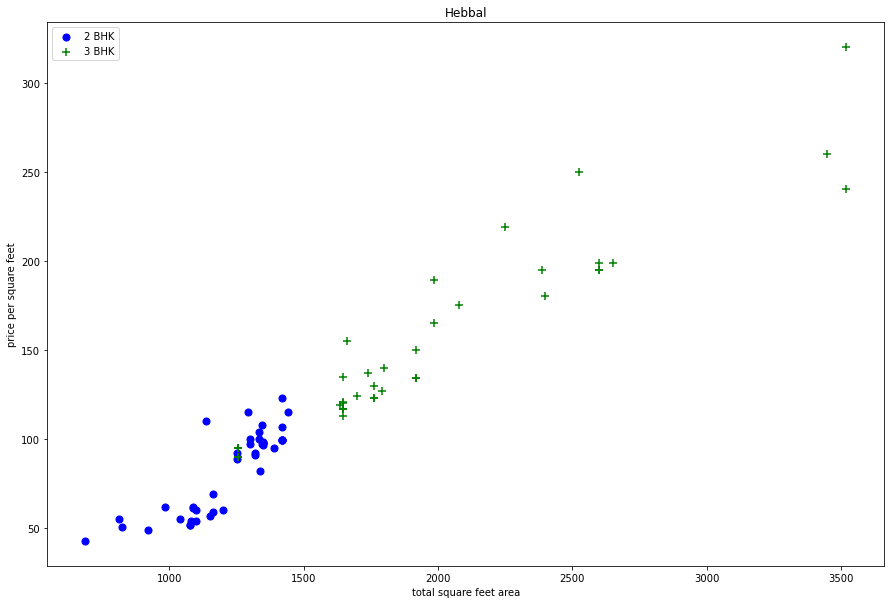

In [94]:
plot_scatter_chart(df8, "Hebbal")

In [95]:
# comparing to previous chart, we can notice that all the green points in the blue dot areas majority were removed
# some abnormalities are fine

In [96]:
# now we'll plot a histogram and chk how many apartments, we have in per sqft area

Text(0, 0.5, 'count')

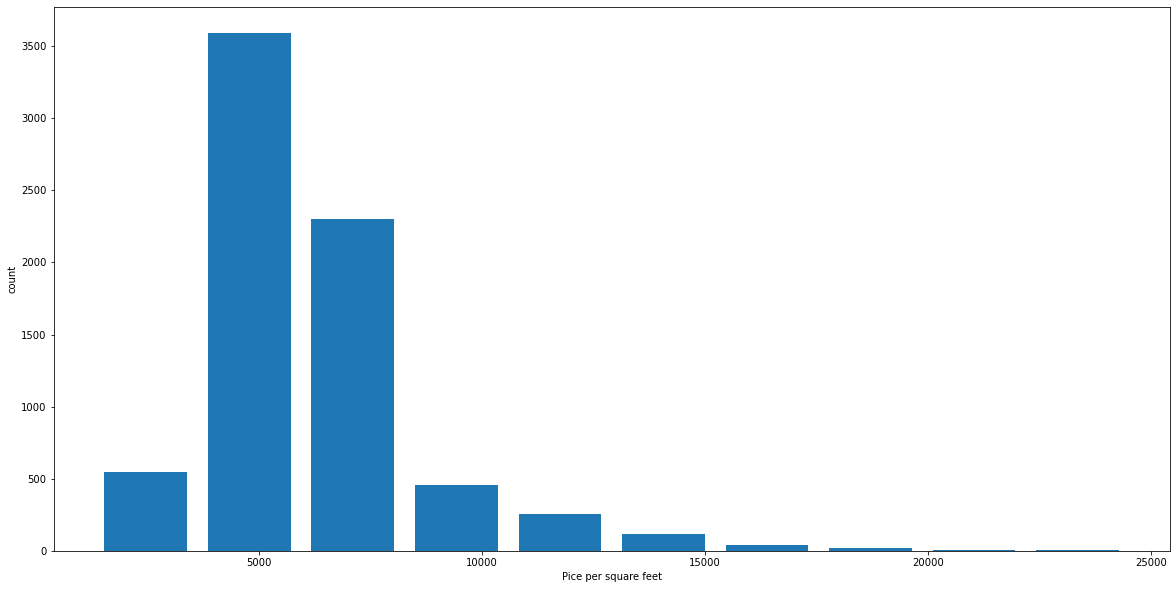

In [97]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Pice per square feet")
plt.ylabel('count')

In [98]:
# let's explore the bathroom feature


In [99]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [100]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [101]:
# here we have concult our business manager regarding this
# let's consider anytime we have bathrooms greter than bedrooms plus 2 then we need to remove those outlier
# let's plot histogram

Text(0, 0.5, 'count')

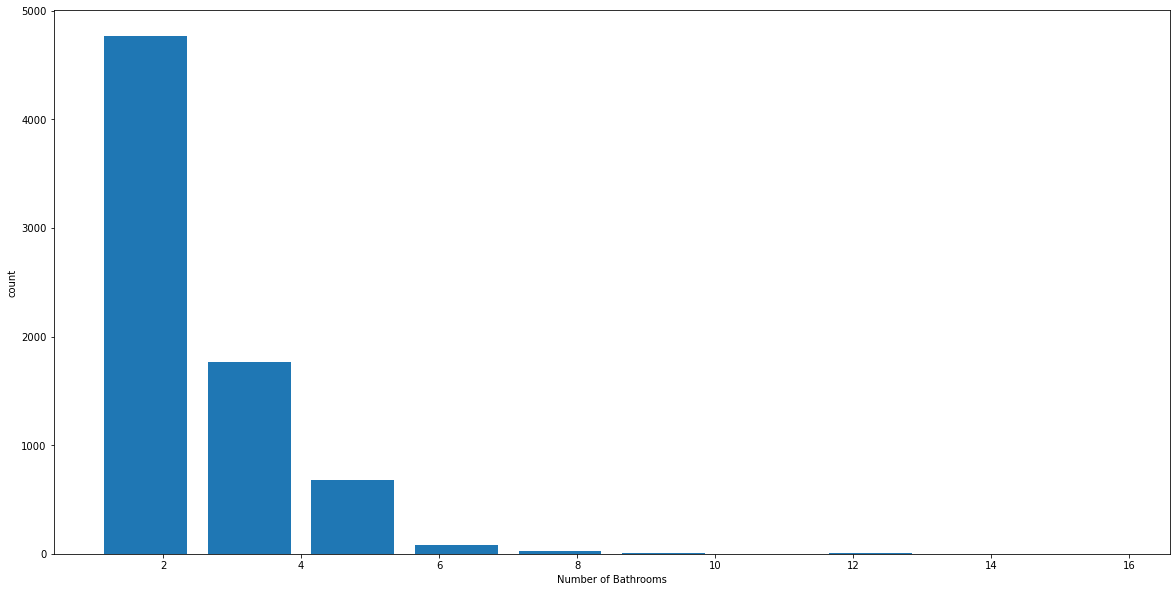

In [102]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('count')

In [103]:
# anytime we have bathrooms greter than bedrooms plus 2 then we need to remove those outlier


In [104]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [105]:
# here 4bhk has 7 bathroom and 3bhk has 6 bathroom

In [106]:
# let's remove these datas

In [107]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [108]:
# now our dataframe is better, let's prepare for machine learning model

In [109]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [110]:
# we'll drop some unnecessary feature like size and price_per_sqft
# for size we have bhk and price_per_sqft were used for outliers

In [111]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


###  Model building

In [112]:
# we'll built machine learning model, using kfold cross validation and grid search cv to built a best algorithm

In [113]:
# let's convert location into numerical column

In [114]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# let create a new dataframe and concate these dummies with original dataframe

In [116]:
#df11 =  pd.concat([df10, dummies], axis='columns')
# to avoid dummy variable trap in onehotencoding let's drop one column
df11 =  pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# let's drop location column since we have dummies

In [118]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# let's start building our model

In [120]:
df12.shape

(7251, 245)

In [121]:
x = df12.drop('price', axis='columns')
y = df12.price

In [122]:
x.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [125]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8452277697874389

In [126]:
# our score is 84% which is pretty descent
# let's try with different parameters and model and come with the best score

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# ShuffleSplit will randomise our data and will have uniform distribution

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# cv- cross validation

cross_val_score(LinearRegression(), x, y ,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [128]:
# let's use gridsearch cv, which works on differrent regression and different parammeters and tells us the best

In [129]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)# randomly shuffles data to get better results
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687479,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.723766,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [130]:
# let's conclude that linear regression performs well

In [131]:
# let's try for 2 samples

In [140]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [146]:
def predict_price(location, sqft, bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1
        
    return lr_clf.predict([X])[0]

In [147]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)
# 1000sqft, 2bath, 2bhk
# 83 lakhs

83.49904677209898

In [148]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)
# 86 lakhs

86.80519395236702

In [149]:
predict_price('Indira Nagar', 1000, 2, 2)
# 1 crore 81 lakhs

181.27815484006317

In [150]:
predict_price('Indira Nagar', 1000, 3, 3)
# 1 crore 84 lakhs

184.5843020203312

### Exporting our model to pickle file



In [151]:
import pickle
with open ('banglore_home_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [152]:
# our pickle file is imported in our location